In [18]:
# Librerias
import quandl
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import time
import locale
%matplotlib inline
import seaborn as sns
import matplotlib
#locale.setlocale(locale.LC_TIME,"es_MX")

#locale.setlocale(locale.LC_ALL,"es_MX")

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Proyecto de Aplicación Profesional

## Optimización De Programas de Inversión para Intermediarios Financieros



### Integrantes:

### - Jazmín Calderón
### - Diana Chávez
### - Juan Antonio Flores




In [2]:
lista = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-1-3-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-20-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-7-10-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-MSCI-Total-International-Stock-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-Mid-Cap-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-US-Aggregate-Bond-ETF_fund.csv', #beta cero
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Edge-MSCI-Min-Vol-EAFE-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Edge-MSCI-Min-Vol-USA-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Edge-MSCI-USA-Quality-Factor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Evol-Media-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Expanded-Tech-Sector-ETF_fund.csv', #nuevo 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Expanded-Tech-Software-Sector-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Floating-Rate-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-JP-Morgan-USD-Emerging-Markets-Bond-ETF_fund.csv', #el ultimo que hice
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-ACWI-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-Japan-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Basic-Materials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Consumer-Services-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Energy-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Financial-Services-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Financials-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Healthcare-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Industrials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Medical-Devices-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Pharmaceuticals-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Technology-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Telecommunications-ETF_fund.csv']

In [3]:
listas = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-1-3-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-20-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-7-10-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-MSCI-Total-International-Stock-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-Mid-Cap-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-US-Aggregate-Bond-ETF_fund.csv', #beta cero
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Edge-MSCI-Min-Vol-EAFE-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Edge-MSCI-Min-Vol-USA-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Edge-MSCI-USA-Quality-Factor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Evol-Media_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Expanded-Tech-Sector-ETF_fund.csv', #nuevo 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Expanded-Tech-Software-Sector-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Floating-Rate-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-JP-Morgan-USD-Emerging-Markets-Bond-ETF_fund.csv', #el ultimo que hice
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-ACWI-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-Japan-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Basic-Materials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Consumer-Services-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Energy-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Financial-Services-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Financials-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Healthcare-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Industrials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Medical-Devices-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Pharmaceuticals-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Technology-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Telecommunications-ETF_fund.csv']

## Importar Datos

## ETF'S

In [4]:
def ETF_date(j):
    fecha=[]

    ETF = pd.read_csv(lista[j], skiprows = [0,1,2,3])
    for i in range(len(ETF["Month End Date"])): #for para numero de fechas dentro de un archivo
        fecha.append(ETF["Month End Date"].iloc[i].replace("-"," "))
        ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
        ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)

    tabla=pd.DataFrame(columns=['Month End Date','Monthly Total (NAV) Return'])
    #tabla.index.name = "ETF"
    tabla['Month End Date'] = fecha
    x=ETF['Monthly Total (NAV) Return']
    tabla['Monthly Total (NAV) Return']=x
    tabla['Month End Date'] = pd.to_datetime(tabla['Month End Date'], format='%b %d, %Y')
    grupo = tabla.groupby(tabla['Month End Date'].dt.year)['Monthly Total (NAV) Return'].agg(["mean","std"]).unstack()

    return(grupo)

In [5]:
#DATAFRAME DE RENDIMIENTOS POR AÑO DE CADA ETF

m0 = ETF_date(0)['mean']
m1 = ETF_date(1)['mean']
m2 = ETF_date(2)['mean']
m3 = ETF_date(3)['mean']
m4 = ETF_date(4)['mean']
m5 = ETF_date(5)['mean']
m6 = ETF_date(6)['mean']
m7 = ETF_date(7)['mean']
m8 = ETF_date(8)['mean']
m9 = ETF_date(9)['mean']
m10 = ETF_date(10)['mean']
m11 = ETF_date(11)['mean']
m12 = ETF_date(12)['mean']
m13 = ETF_date(13)['mean']
m14 = ETF_date(14)['mean']
m15 = ETF_date(15)['mean']
m16 = ETF_date(16)['mean']
m17 = ETF_date(17)['mean']
m18 = ETF_date(18)['mean']
m19 = ETF_date(19)['mean']
m20 = ETF_date(20)['mean']
m21 = ETF_date(21)['mean']
m22 = ETF_date(22)['mean']
m23 = ETF_date(23)['mean']
m24 = ETF_date(24)['mean']
m25 = ETF_date(25)['mean']
m26 = ETF_date(26)['mean']
m27 = ETF_date(27)['mean']
m28 = ETF_date(28)['mean']
m29 = ETF_date(29)['mean']
m30 = ETF_date(30)['mean']
m31 = ETF_date(31)['mean']
m32 = ETF_date(32)['mean']
m33 = ETF_date(33)['mean']
m34 = ETF_date(34)['mean']
m35 = ETF_date(35)['mean']
m36 = ETF_date(36)['mean']
m37 = ETF_date(37)['mean']
m38 = ETF_date(38)['mean']
m39 = ETF_date(39)['mean']


a = pd.DataFrame({'1-3 Year Treasury Bond': m0,'20 Year Treasury Bond': m1,
                  '7 10 Year Treasury Bond': m2,'Core MSCI EAFE': m3,
                  'Core MSCI Emerging Markets': m4,'Core MSCI International Stock': m5,
                  'SP 500': m6,'SP Mid Cap': m7, 'SP Total US Stock Market': m8,
                  'US Aggregate Bond': m9, 'Edge MSCI Min Vol EAFE': m10,
                  'Edge MSCI Min Vol USA': m11, 'Edge MSCI USA Quality Factor': m12,
                  'Evol Media': m13, 'Expanded Tech Sector': m14,'Expanded Tech Software Sector': m15,
                  'Floating Rate Bond': m16, 'JP Morgan USD Emerging Markets Bond': m17,
                  'MSCI ACWI': m18,'MSCI EAFE': m19, 'MSCI Emerging Markets': m20,
                  'MSCI Japan': m21, 'Nasdaq Biotechnology': m22,'Russell 1000': m23,
                  'Russell 1000 Growth': m24, 'Russell 1000 Value': m25, 'Russell 2000': m26,
                  'SP 500 Growth': m27, 'SP 500 Value': m28, 'US Basic Materials': m29,
                  'US Consumer Services': m30,'US Energy': m31, 'US Financial Services': m32,
                  'US Financials': m33, 'US Healthcare': m34,'US Industrials': m35,
                  'US Medical Devices': m36, 'US Pharmaceuticals': m37, 'US Technology': m38,
                  'US Telecommunications': m39 })

pd.set_option('display.max_columns', 40)
b = a.fillna("")
b

,1-3 Year Treasury Bond,20 Year Treasury Bond,7 10 Year Treasury Bond,Core MSCI EAFE,Core MSCI Emerging Markets,Core MSCI International Stock,Edge MSCI Min Vol EAFE,Edge MSCI Min Vol USA,Edge MSCI USA Quality Factor,Evol Media,Expanded Tech Sector,Expanded Tech Software Sector,Floating Rate Bond,JP Morgan USD Emerging Markets Bond,MSCI ACWI,MSCI EAFE,MSCI Emerging Markets,MSCI Japan,Nasdaq Biotechnology,Russell 1000,Russell 1000 Growth,Russell 1000 Value,Russell 2000,SP 500,SP 500 Growth,SP 500 Value,SP Mid Cap,SP Total US Stock Market,US Aggregate Bond,US Basic Materials,US Consumer Services,US Energy,US Financial Services,US Financials,US Healthcare,US Industrials,US Medical Devices,US Pharmaceuticals,US Technology,US Telecommunications
Month End Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,,,,,,,,,,,,,,,,,,-1.640000,,,,,,,,,,,,,,,,,,,,,,
1997,,,,,,,,,,,,,,,,,,-2.009167,,,,,,,,,,,,,,,,,,,,,,
1998,,,,,,,,,,,,,,,,,,0.530833,,,,,,,,,,,,,,,,,,,,,,
1999,,,,,,,,,,,,,,,,,,4.013333,,,,,,,,,,,,,,,,,,,,,,
2000,,,,,,,,,,,,,,,,,,-2.588333,,-0.6925,-2.47625,0.8575,0.46,-1.01625,-2.25375,0.8175,1.26,,,2.48571,-1.08143,1.94714,3.53,,,-0.244286,,,-4.14625,-4.325
2001,,,,,,,,,,,0.596,0.52,,,,-0.622,,-2.831667,0.237273,-0.9575,-1.53083,-0.425,0.385,-0.904167,-0.939167,-0.921667,0.1525,,,0.266667,0.306667,-0.8725,-0.435,0.001,-0.376,-0.646667,,,-1.515,-1.38667
2002,0.331667,1.56667,1.09333,,,,,,,,-3.48333,-3.95583,,,,-1.26,,-0.770000,-4.55833,-1.86167,-2.525,-1.25333,-1.6875,-1.90083,-2.07667,-1.75083,-1.18167,,,-0.536667,-2.1525,-1.24333,-0.916667,-0.998333,-1.88917,-2.2125,,,-3.26167,-3.18417
2003,0.1475,0.236667,0.200833,,,,,,,,3.74417,3.53667,,,,2.8275,5.01556,2.673333,3.3875,2.23667,2.21083,2.25417,3.355,2.16167,1.9325,2.3875,2.62083,,0.0725,2.6525,2.4975,2.14833,2.54667,2.37583,1.4725,2.45167,,,3.52917,1.14417
2004,0.0666667,0.7475,0.379167,,,,,,,,0.314167,1.18333,,,,1.5475,2.01,1.285833,0.450833,0.915833,0.526667,1.285,1.4825,0.8775,0.504167,1.2275,1.3075,0.780833,0.331667,1.05417,0.86,2.38083,0.981667,1.04083,0.364167,1.30667,,,0.219167,1.42


In [6]:
#FUNCIÓN PARA OBTENER SHARES DE CADA ETF POR AÑO
def ETF_share(j):
    fecha=[]
    
    ETF = pd.read_csv(listas[j])
    ETF = ETF.drop(columns = ['Index Level', 'NAV per Share', 'Ex-Dividends'])
    for i in range(len(ETF["As Of"])): #for para numero de fechas dentro de un archivo
            fecha.append(ETF["As Of"].iloc[i].replace("-"," "))
    tabla=pd.DataFrame(columns=['Shares Outstanding'])
    tabla['As Of'] = fecha
    x=ETF['Shares Outstanding']
    tabla['Shares Outstanding']=x
    tabla['As Of'] = pd.to_datetime(tabla['As Of'], format='%d %b %y')
    share = tabla.groupby(tabla['As Of'].dt.year)['Shares Outstanding'].agg(['sum'])
    return(share)

In [7]:
# DATAFRAME DE LA CANTIDAD DE SHARES DE CADA ETF ANUAL

s0 = ETF_share(0)['sum']
s1 = ETF_share(1)['sum']
s2 = ETF_share(2)['sum']
s3 = ETF_share(3)['sum']
s4 = ETF_share(4)['sum']
s5 = ETF_share(5)['sum']
s6 = ETF_share(6)['sum']
s7 = ETF_share(7)['sum']
s8 = ETF_share(8)['sum']
s9 = ETF_share(9)['sum']
s10 = ETF_share(10)['sum']
s11 = ETF_share(11)['sum']
s12 = ETF_share(12)['sum']
s13 = ETF_share(13)['sum']
s14 = ETF_share(14)['sum']
s15 = ETF_share(15)['sum']
s16 = ETF_share(16)['sum']
s17 = ETF_share(17)['sum']
s18 = ETF_share(18)['sum']
s19 = ETF_share(19)['sum']
s20 = ETF_share(20)['sum']
s21 = ETF_share(21)['sum']
s22 = ETF_share(22)['sum']
s23 = ETF_share(23)['sum']
s24 = ETF_share(24)['sum']
s25 = ETF_share(25)['sum']
s26 = ETF_share(26)['sum']
s27 = ETF_share(27)['sum']
s28 = ETF_share(28)['sum']
s29 = ETF_share(29)['sum']
s30 = ETF_share(30)['sum']
s31 = ETF_share(31)['sum']
s32 = ETF_share(32)['sum']
s33 = ETF_share(33)['sum']
s34 = ETF_share(34)['sum']
s35 = ETF_share(35)['sum']
s36 = ETF_share(36)['sum']
s37 = ETF_share(37)['sum']
s38 = ETF_share(38)['sum']
s39 = ETF_share(39)['sum']


sa = pd.DataFrame({'1-3 Year Treasury Bond': s0,'20 Year Treasury Bond': s1,
                  '7 10 Year Treasury Bond': s2,'Core MSCI EAFE': s3,
                  'Core MSCI Emerging Markets': s4,'Core MSCI International Stock': s5,
                  'SP 500': s6,'SP Mid Cap': s7, 'SP Total US Stock Market': s8,
                  'US Aggregate Bond': s9, 'Edge MSCI Min Vol EAFE': s10,
                  'Edge MSCI Min Vol USA': s11, 'Edge MSCI USA Quality Factor': s12,
                  'Evol Media': s13, 'Expanded Tech Sector': s14,'Expanded Tech Software Sector': s15,
                  'Floating Rate Bond': s16, 'JP Morgan USD Emerging Markets Bond': s17,
                  'MSCI ACWI': s18,'MSCI EAFE': s19, 'MSCI Emerging Markets': s20,
                  'MSCI Japan': s21, 'Nasdaq Biotechnology': s22,'Russell 1000': s23,
                  'Russell 1000 Growth': s24, 'Russell 1000 Value': s25, 'Russell 2000': s26,
                  'SP 500 Growth': s27, 'SP 500 Value': s28, 'US Basic Materials': s29,
                  'US Consumer Services': s30,'US Energy': s31, 'US Financial Services': s32,
                  'US Financials': s33, 'US Healthcare': s34,'US Industrials': s35,
                  'US Medical Devices': s36, 'US Pharmaceuticals': s37, 'US Technology': s38,
                  'US Telecommunications': s39  })

pd.set_option('display.max_columns', 40)
sb = sa.fillna("")

In [8]:
a_etf = []
for i in range(1995,2019):
    a_etf.append(1+i)

In [9]:
#PARTICIPACIONES TOTALES POR AÑO DE CADA ETF
suma = []
for i in range(1996,2020):
    mm = sa.loc[i].sum()
    suma.append(mm)

In [10]:
#ESTO ES LA SUMA TOTAL DE SHARES POR AÑO

s_etfs = pd.DataFrame(columns=['Shares Totales'])
s_etfs['Año'] = a_etf
s_etfs.set_index('Año',inplace=True)
s_etfs['Shares Totales'] = suma
s_etfs

,Shares Totales
Año,
1996,3.063505e+08
1997,6.843632e+08
1998,1.273713e+09
1999,2.929863e+09
2000,9.027463e+09
2001,2.926166e+10
2002,7.908817e+10
2003,1.267716e+11
2004,2.504809e+11


In [11]:
#DATAFRAME DE LAS PROPORCIONES POR ETF POR PORTAFOLIO ANUAL
prop = sa.iloc[:].divide(sa.sum(axis=1), axis = 0)
pro = prop.fillna("")
pro

,1-3 Year Treasury Bond,20 Year Treasury Bond,7 10 Year Treasury Bond,Core MSCI EAFE,Core MSCI Emerging Markets,Core MSCI International Stock,Edge MSCI Min Vol EAFE,Edge MSCI Min Vol USA,Edge MSCI USA Quality Factor,Evol Media,Expanded Tech Sector,Expanded Tech Software Sector,Floating Rate Bond,JP Morgan USD Emerging Markets Bond,MSCI ACWI,MSCI EAFE,MSCI Emerging Markets,MSCI Japan,Nasdaq Biotechnology,Russell 1000,Russell 1000 Growth,Russell 1000 Value,Russell 2000,SP 500,SP 500 Growth,SP 500 Value,SP Mid Cap,SP Total US Stock Market,US Aggregate Bond,US Basic Materials,US Consumer Services,US Energy,US Financial Services,US Financials,US Healthcare,US Industrials,US Medical Devices,US Pharmaceuticals,US Technology,US Telecommunications
As Of,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,,,,,,,,,,,,,,,,,,1.000000,,,,,,,,,,,,,,,,,,,,,,
1997,,,,,,,,,,,,,,,,,,1.000000,,,,,,,,,,,,,,,,,,,,,,
1998,,,,,,,,,,,,,,,,,,1.000000,,,,,,,,,,,,,,,,,,,,,,
1999,,,,,,,,,,,,,,,,,,1.000000,,,,,,,,,,,,,,,,,,,,,,
2000,,,,,,,,,,,,,,,,,,0.410405,,0.0589368,0.0127888,0.022138,0.0809197,0.186437,0.0187151,0.0238938,0.0708172,,,0.00391583,0.00388814,0.0312048,0.00948772,0.0200776,0.00743287,0.00671839,,,0.018128,0.0140959
2001,,,,,,,,,,,0.0112263,0.00220254,,,,0.0391229,,0.121400,0.0342735,0.0338805,0.0511693,0.0525141,0.218463,0.193501,0.0330791,0.0599915,0.0489617,,,0.00282281,0.00480321,0.0291986,0.00340035,0.00678704,0.0179501,0.00636327,,,0.0161167,0.0127727
2002,0.0131878,0.0100963,0.0113304,,,,,,,,0.00299286,0.00320718,,,,0.200844,,0.059522,0.0620213,0.0329076,0.0396456,0.050768,0.188763,0.126466,0.030418,0.0403758,0.0434515,,,0.00531495,0.0091771,0.0205878,0.00195288,0.00509811,0.0165012,0.0051019,,,0.0112236,0.00904497
2003,0.0231803,0.00804596,0.00893181,,,,,,,,0.00488477,0.00552647,,,,0.153621,0.0329589,0.082585,0.0588834,0.0504257,0.0505878,0.0576312,0.128029,0.12,0.0366892,0.0407236,0.0508394,,0.000769099,0.00770046,0.00540539,0.0192547,0.00192472,0.00438899,0.0151686,0.00498613,,,0.0136233,0.013236
2004,0.0223885,0.00439235,0.006448,,,,,,,,0.00387035,0.00334776,,,,0.184404,0.114645,0.129745,0.0462622,0.0295502,0.0441329,0.0527421,0.0970553,0.0824905,0.0303418,0.0379568,0.0309632,0.0022357,0.00563396,0.00745566,0.00349148,0.0210136,0.00115258,0.00287667,0.0116492,0.0039528,,,0.00773851,0.012064


In [12]:
#DATAFRAME DEL RENDIMIENTO DE CADA ETF DENTRO DEL PORTAFOLIO DE ETF'S POR AÑO
port = prop.iloc[:].mul(a, axis = 0)
r_p = port.fillna("")
r_p

,1-3 Year Treasury Bond,20 Year Treasury Bond,7 10 Year Treasury Bond,Core MSCI EAFE,Core MSCI Emerging Markets,Core MSCI International Stock,Edge MSCI Min Vol EAFE,Edge MSCI Min Vol USA,Edge MSCI USA Quality Factor,Evol Media,Expanded Tech Sector,Expanded Tech Software Sector,Floating Rate Bond,JP Morgan USD Emerging Markets Bond,MSCI ACWI,MSCI EAFE,MSCI Emerging Markets,MSCI Japan,Nasdaq Biotechnology,Russell 1000,Russell 1000 Growth,Russell 1000 Value,Russell 2000,SP 500,SP 500 Growth,SP 500 Value,SP Mid Cap,SP Total US Stock Market,US Aggregate Bond,US Basic Materials,US Consumer Services,US Energy,US Financial Services,US Financials,US Healthcare,US Industrials,US Medical Devices,US Pharmaceuticals,US Technology,US Telecommunications
As Of,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,,,,,,,,,,,,,,,,,,-1.640000,,,,,,,,,,,,,,,,,,,,,,
1997,,,,,,,,,,,,,,,,,,-2.009167,,,,,,,,,,,,,,,,,,,,,,
1998,,,,,,,,,,,,,,,,,,0.530833,,,,,,,,,,,,,,,,,,,,,,
1999,,,,,,,,,,,,,,,,,,4.013333,,,,,,,,,,,,,,,,,,,,,,
2000,,,,,,,,,,,,,,,,,,-1.062264,,-0.0408138,-0.0316682,0.0189833,0.0372231,-0.189466,-0.0421792,0.0195331,0.0892297,,,0.00973363,-0.00420474,0.0607602,0.0334916,,,-0.00164121,,,-0.0751633,-0.0609647
2001,,,,,,,,,,,0.00669087,0.00114532,,,,-0.0243344,,-0.343764,0.00813217,-0.0324406,-0.0783317,-0.0223185,0.0841084,-0.174957,-0.0310668,-0.0552921,0.00746666,,,0.000752748,0.00147299,-0.0254758,-0.00147915,6.78704e-06,-0.00674924,-0.00411492,,,-0.0244167,-0.0177115
2002,0.00437396,0.0158176,0.0123879,,,,,,,,-0.0104251,-0.0126871,,,,-0.253064,,-0.045832,-0.282714,-0.0612629,-0.100105,-0.0636293,-0.318537,-0.240392,-0.0631679,-0.0706913,-0.0513452,,,-0.00285236,-0.0197537,-0.0255975,-0.00179014,-0.00508961,-0.0311735,-0.011288,,,-0.0366075,-0.0288007
2003,0.00341909,0.00190421,0.0017938,,,,,,,,0.0182894,0.0195453,,,,0.434364,0.165307,0.220776,0.199468,0.112785,0.111841,0.12991,0.429536,0.259399,0.0709019,0.0972276,0.133242,,5.57597e-05,0.0204255,0.0135,0.0413655,0.00490162,0.0104275,0.0223358,0.0122243,,,0.0480789,0.0151442
2004,0.00149257,0.00328328,0.00244487,,,,,,,,0.00121594,0.00396152,,,,0.285366,0.230436,0.166830,0.0208565,0.027063,0.0232433,0.0677737,0.143884,0.0723854,0.0152973,0.046592,0.0404844,0.00174571,0.0018686,0.00785951,0.00300268,0.0500298,0.00113145,0.00299413,0.00424225,0.00516499,,,0.00169602,0.0171309


In [13]:
#Rendimientos por año de ETF
ren_port = []
for i in range(1996,2020):
    nn = port.loc[i].sum()
    ren_port.append(nn)

In [14]:
#Desv por año de ETF
des_a = []
for i in range(1996,2020):
    ll = a.loc[i].std()
    des_a.append(ll)

In [15]:
#Cuando hay nan para saber cuantos fondos por año
po = []
c = a.isnull().sum(axis=1)
num = (len(lista)-c)
po.append(num)

### Medidas de Atribución al desempeño

In [26]:
usd_rate = [0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           0.0241,0.0241]#,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           #0.0241,0.0241,0.0239] #tasa libre de riesgo EEUU #0.0241
sharpe_ETF=[]
for i in range(24):
    #sharpe[i] = (rend[i]-usd_rate[i])/desv[i]
    sharpe_ETF.append((ren_port[i]-usd_rate[i])/des_a[i])
#print(sharpe_ETF)

In [ ]:
##Q19*(1-(O14/M15))+M13*(O14/M15) formula para sacar rp*

In [32]:
unos= np.ones(24)

In [29]:
dj=[0.000521425,-0.000593576,-0.000555444,-0.000563929,0.000169342,0.000521425,0.000809337,-0.000980305,3.00E-05,-0.000131266,
    -0.000526652,5.30E-05,0.002534935,-0.001651877,-0.000595315,-0.000150812,-0.000293395,-0.000537755,-0.000444177,
    0.000453782,-0.000901659,5.30E-05,0.002534935,-0.001651877,-0.000595315,-0.000150812,-0.000293395,-0.000537755,-0.000444177,
    0.000453782,-0.000901659,0.000521425,0.000521425]

In [31]:
var_bond=[]
for i in range(24):
    x=0.0015
    var_bond.append(x)
    
#var_bond


In [34]:
mcuadrado=[]
for i in range (24):
    ope=usd_rate[i]*(1-(0.0015/des_a[i]))+ren_port[i]*(0.0015/des_a[i])
    mcuadrado.append(ope)

In [40]:
n_etf1 = n_etf.drop(columns = ['ETFs en portafolio'])
n_etf1 = n_etf1.fillna(0)
#n_etf1

In [41]:
num = ['1','1','1','1','16','22','25','27','28','29','30','31','32','32','32','35','38','39','39','39','39','39','40','40']
n_etf = pd.DataFrame(columns=['ETFs en portafolio', 'Rendimiento', 'Volatilidad','sharpe','mcuadrado'])
n_etf['Año'] = a_etf
n_etf.set_index('Año',inplace=True)
n_etf['ETFs en portafolio'] = num
n_etf['Rendimiento'] = ren_port
n_etf['Volatilidad'] = des_a
n_etf['sharpe'] = sharpe_ETF
n_etf['mcuadrado'] = mcuadrado
n_etf.fillna("-")

,ETFs en portafolio,Rendimiento,Volatilidad,sharpe,mcuadrado
Año,,,,,
1996,1,-1.640000,-,-,-
1997,1,-2.009167,-,-,-
1998,1,0.530833,-,-,-
1999,1,4.013333,-,-,-
2000,16,-1.239411,2.29055,-0.55162,0.0232726
2001,22,-0.732676,0.83684,-0.904326,0.0227435
2002,25,-1.704226,1.43242,-1.20672,0.0224899
2003,27,2.598169,1.17743,2.18601,0.027579
2004,28,1.249476,0.549175,2.23112,0.0275467


In [42]:
vegetables =a_etf
farmers = ["Rendimiento", "Riesgo","sharpe","mcuadrado"]

harvest = np.array([n_etf1.iloc[0],n_etf1.iloc[1],n_etf1.iloc[2],n_etf1.iloc[3],n_etf1.iloc[4],
                   n_etf1.iloc[5],n_etf1.iloc[6],n_etf1.iloc[7],n_etf1.iloc[8],n_etf1.iloc[9],
                   n_etf1.iloc[10],n_etf1.iloc[11],n_etf1.iloc[12],n_etf1.iloc[13],n_etf1.iloc[14],
                   n_etf1.iloc[15],n_etf1.iloc[16],n_etf1.iloc[17],n_etf1.iloc[18],n_etf1.iloc[19],
                   n_etf1.iloc[20],n_etf1.iloc[21],n_etf1.iloc[22],n_etf1.iloc[23]])

In [43]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

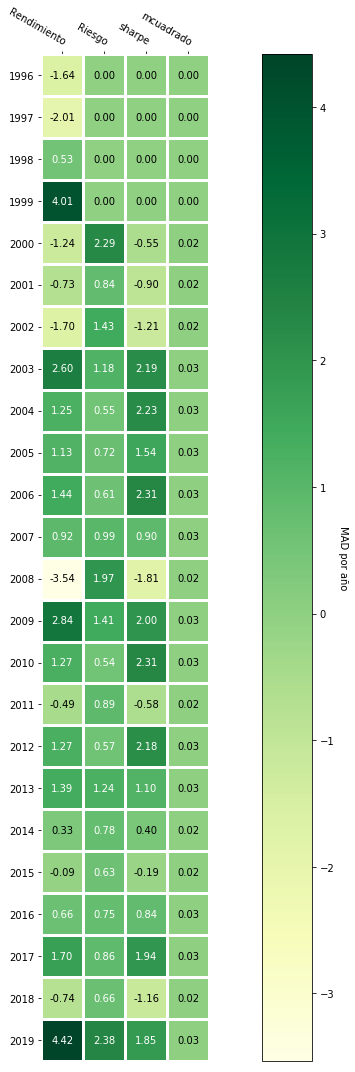

In [44]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="MAD por año")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()